In [5]:
import pandas as pd
import polars as pl
import os

In [6]:
#ONLY RUN THIS ONCE
os.chdir("..")
os.path.abspath(os.curdir)

'/Users/claireboyd/courses/advanced_ml/dirty_comments_and_clean_plates'

In [21]:
all_reviews = pl.scan_ndjson("data/yelp_dataset/yelp_academic_dataset_review.json")

In [22]:
all_reviews.schema

OrderedDict([('review_id', String),
             ('user_id', String),
             ('business_id', String),
             ('stars', Float64),
             ('useful', Int64),
             ('funny', Int64),
             ('cool', Int64),
             ('text', String),
             ('date', String)])

In [9]:
all_reviews.count().collect(streaming=True)

review_id,user_id,business_id,stars,useful,funny,cool,text,date
u32,u32,u32,u32,u32,u32,u32,u32,u32
6990280,6990280,6990280,6990280,6990280,6990280,6990280,6990280,6990280


In [16]:
all_businesses = pl.scan_ndjson("data/yelp_dataset/yelp_academic_dataset_business.json")

In [17]:
all_businesses.count().collect(streaming=True)

business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
150346,150346,150346,150346,150346,150346,150346,150346,150346,150346,150346,136602,150243,127123


In [31]:
df = all_reviews.select(["user_id", "text", "date"]).collect(streaming=True)

In [32]:
df.head()

user_id,text,date
str,str,str
"""mh_-eMZ6K5RLWh…","""If you decide …","""2018-07-07 22:…"
"""OyoGAe7OKpv6Sy…","""I've taken a l…","""2012-01-03 15:…"
"""8g_iMtfSiwikVn…","""Family diner. …","""2014-02-05 20:…"
"""_7bHUi9Uuf5__H…","""Wow! Yummy, d…","""2015-01-04 00:…"
"""bcjbaE6dDog4jk…","""Cute interior …","""2017-01-14 20:…"


In [6]:
all_users = pl.scan_ndjson("data/yelp_dataset/yelp_academic_dataset_user.json")

In [7]:
all_users.schema

OrderedDict([('user_id', String),
             ('name', String),
             ('review_count', Int64),
             ('yelping_since', String),
             ('useful', Int64),
             ('funny', Int64),
             ('cool', Int64),
             ('elite', String),
             ('friends', String),
             ('fans', Int64),
             ('average_stars', Float64),
             ('compliment_hot', Int64),
             ('compliment_more', Int64),
             ('compliment_profile', Int64),
             ('compliment_cute', Int64),
             ('compliment_list', Int64),
             ('compliment_note', Int64),
             ('compliment_plain', Int64),
             ('compliment_cool', Int64),
             ('compliment_funny', Int64),
             ('compliment_writer', Int64),
             ('compliment_photos', Int64)])

In [8]:
all_users.collect(streaming=True).head()

KeyboardInterrupt: 

In [14]:
all_reviews.head(5).collect()

review_id,user_id,business_id,stars,useful,funny,cool,text,date
str,str,str,f64,i64,i64,i64,str,str
"""KU_O5udG6zpxOg…","""mh_-eMZ6K5RLWh…","""XQfwVwDr-v0ZS3…",3.0,0,0,0,"""If you decide …","""2018-07-07 22:…"
"""BiTunyQ73aT9WB…","""OyoGAe7OKpv6Sy…","""7ATYjTIgM3jUlt…",5.0,1,0,1,"""I've taken a l…","""2012-01-03 15:…"
"""saUsX_uimxRlCV…","""8g_iMtfSiwikVn…","""YjUWPpI6HXG530…",3.0,0,0,0,"""Family diner. …","""2014-02-05 20:…"
"""AqPFMleE6RsU23…","""_7bHUi9Uuf5__H…","""kxX2SOes4o-D3Z…",5.0,1,0,1,"""Wow! Yummy, d…","""2015-01-04 00:…"
"""Sx8TMOWLNuJBWe…","""bcjbaE6dDog4jk…","""e4Vwtrqf-wpJfw…",4.0,1,0,1,"""Cute interior …","""2017-01-14 20:…"


In [34]:
pl.read_csv("data/phila/labeled_inspections_with_reviews.csv")

,Organization Name,Active Indicator,Public Facility Name,Program Group Type,Address,City,County Name,Zip Code,State,Inspection Date,Inspection Reason Type,Overall Compliance,Georeferenced Latitude and Longitude,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,prev_date,prev_date_with_nulls,reviews,ratings,n_reviews,avg_rating
i64,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,i64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,i64,f64
10735,"""Chester County…","""Yes""","""158 LICENSE, L…","""ChesterCountyF…","""158 W GAY ST""","""West Chester""","""Chester""",19380.0,"""PA""","""2019-03-20 00:…","""Opening""","""Yes""","""POINT (-75.607…","""qV325HCv3cZKgd…","""Landmark Ameri…","""158 W GAY ST""","""West Chester""","""PA""",19380,39.959266,-75.607422,2.5,116.0,0.0,"""{'RestaurantsP…","""Restaurants, A…","""{'Monday': '11…",null,"""2018-03-25 00:…","""[""Our first vi…","""[1.0, 3.0, 1.0…",11,2.454545
56848,"""PENNSYLVANIA D…","""Yes""","""3 B'S LOUNGE""","""Food""","""309 S MAIN ST""","""ZELIENOPLE""","""Butler""",16063.0,"""PA""","""2018-05-16 00:…","""Regular""","""Yes""","""POINT (-80.136…","""19EuqHznljFunk…","""J.T. Bankers""","""309 S MAIN ST""","""Sellersville""","""PA""",18960,40.353414,-75.305458,4.0,29.0,1.0,"""{'RestaurantsG…","""American (Trad…","""{'Monday': '11…",null,"""2017-05-21 00:…","""['Stopped in f…","""[4.0, 5.0]""",2,4.5
72731,"""PENNSYLVANIA D…","""Yes""","""3 B'S LOUNGE""","""Food""","""309 S MAIN ST""","""ZELIENOPLE""","""Butler""",16063.0,"""PA""","""2019-06-03 00:…","""Regular""","""Yes""","""POINT (-80.136…","""19EuqHznljFunk…","""J.T. Bankers""","""309 S MAIN ST""","""Sellersville""","""PA""",18960,40.353414,-75.305458,4.0,29.0,1.0,"""{'RestaurantsG…","""American (Trad…","""{'Monday': '11…","""2018-05-16 00:…","""2018-05-16 00:…","""['Six of us we…","""[5.0, 1.0, 4.0…",7,3.571429
289,"""Chester County…","""Yes""","""30 MAIN""","""ChesterCountyF…","""660 LANCASTER …","""Berwyn""","""Chester""",19312.0,"""PA""","""2018-05-03 00:…","""Follow-up""","""Yes""","""POINT (-75.442…","""ypEtkQK37INcwF…","""30 Main""","""660 LANCASTER …","""Berwyn""","""PA""",19312,40.047585,-75.442132,4.0,54.0,1.0,"""{'RestaurantsP…","""American (New)…","""{'Tuesday': '1…",null,"""2017-05-08 00:…","""[""So I read al…","""[2.0, 5.0, 5.0…",11,3.363636
15080,"""Chester County…","""Yes""","""30 MAIN""","""ChesterCountyF…","""660 LANCASTER …","""Berwyn""","""Chester""",19312.0,"""PA""","""2018-05-22 00:…","""Complaint""","""Yes""","""POINT (-75.442…","""ypEtkQK37INcwF…","""30 Main""","""660 LANCASTER …","""Berwyn""","""PA""",19312,40.047585,-75.442132,4.0,54.0,1.0,"""{'RestaurantsP…","""American (New)…","""{'Tuesday': '1…","""2018-05-03 00:…","""2018-05-03 00:…","""['Ordered thro…","""[1.0, 2.0, 5.0…",5,2.2
12444,"""Chester County…","""Yes""","""30 MAIN""","""ChesterCountyF…","""660 LANCASTER …","""Berwyn""","""Chester""",19312.0,"""PA""","""2019-02-28 00:…","""Regular""","""Yes""","""POINT (-75.442…","""ypEtkQK37INcwF…","""30 Main""","""660 LANCASTER …","""Berwyn""","""PA""",19312,40.047585,-75.442132,4.0,54.0,1.0,"""{'RestaurantsP…","""American (New)…","""{'Tuesday': '1…","""2018-05-22 00:…","""2018-05-22 00:…","""['I had dinner…","""[4.0, 5.0, 5.0…",8,3.75
7468,"""Chester County…","""Yes""","""30 MAIN""","""ChesterCountyF…","""660 LANCASTER …","""Berwyn""","""Chester""",19312.0,"""PA""","""2020-02-07 00:…","""Regular""","""Yes""","""POINT (-75.442…","""ypEtkQK37INcwF…","""30 Main""","""660 LANCASTER …","""Berwyn""","""PA""",19312,40.047585,-75.442132,4.0,54.0,1.0,"""{'RestaurantsP…","""American (New)…","""{'Tuesday': '1…","""2019-02-28 00:…","""2019-02-28 00:…","""['Went with my…","""[5.0, 1.0, 5.0…",5,2.8
1278,"""Chester County…","""Yes""","""30 MAIN""","""ChesterCountyF…","""660 LANCASTER …","""Berwyn""","""Chester""",19312.0,"""PA""","""2020-02-19 00:…","""Follow-up""","""Yes""","""POINT (-75.442…","""ypEtkQK37INcwF…","""30 Ma

Raul's new CSV

In [14]:
import pandas as pd
import re

verified_reviews = pd.read_csv("data/yelp/yelp_verified_slim.csv")

In [21]:
def clean_texts(raw_text):
    text = ' '.join(raw_text.split(r'\n'))
    text = re.sub("[^a-zA-Z0-9]"," ",text).lower()
    #delete numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(' +', ' ', text)
    return text

In [22]:
verified_reviews["cleaned_text"] = verified_reviews['text'].apply(clean_texts)

In [39]:
verified_reviews["cleaned_text_length"] = verified_reviews["cleaned_text"].str.split().apply(len)

count    11106.000000
mean       145.183054
std        103.503520
min          6.000000
25%         73.000000
50%        119.000000
75%        187.000000
max        989.000000
Name: cleaned_text_length, dtype: float64

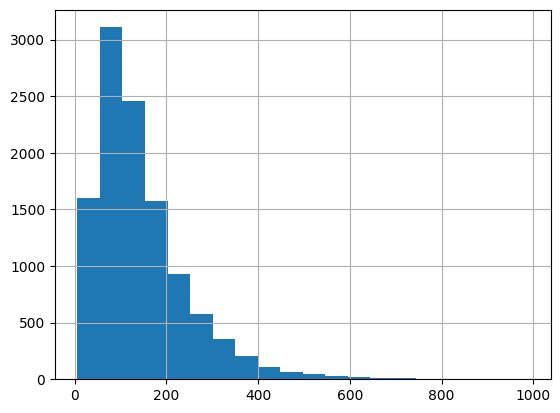

In [47]:
verified_reviews["cleaned_text_length"].hist(bins=20)

verified_reviews.loc[:,"cleaned_text_length"].describe()